In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [4]:
# calculate seconds for sent
def get_processed_df(received_data_path: str, sent_data_path: str) -> pd.DataFrame:
    """
    Get processed dataframe for a run.  
    It will merge sent and received json files and calculate seconds for sent packets.
    """
    sent_df = pd.read_json(sent_data_path)
    received_df = pd.read_json(received_data_path)
    received_df = None
    
    sent_df = pd.json_normalize(sent_df['sent_packet_list'])
    received_df = pd.json_normalize(received_df['received_packet_list'])
    sent_df['second'] = (sent_df['sent_time'] - sent_df['sent_time'].iloc[0]) / 1000
    sent_df['second'] = sent_df['second'].apply(lambda x: math.floor(x))
    sent_df['packet_id'] = sent_df['packet_id'].astype(int)
    received_df['packet_id'] = received_df['packet_id'].astype(int)
    sent_received = pd.merge(sent_df, received_df, how='left', left_on='packet_id', right_on='packet_id')
    sent_received['delay'] = sent_received['received_time'] - sent_received['sent_time']
    return sent_received

In [5]:
def get_stats_values(df: pd.DataFrame) -> None:
    total_sent_packets = df.shape[0]
    total_received_packets = df[df['received_time'].notnull()].shape[0]
    print(f"Total sent packets: {total_sent_packets}")
    print(f"Total received packets: {total_received_packets}")
    print(f"Total lost packets: {total_sent_packets - total_received_packets}")
    print(f"Total lost packets percentage: {(total_sent_packets - total_received_packets) / total_sent_packets * 100}%")
    print(f"Average delay: {df['delay'].mean()} ms")

In [ ]:
_10k_drop_0_1_received_df = get_processed_df("received-data/LAN/10k_drop_0_1.json", "sent-data/10k-drop-0.1.json")

In [7]:
df1 = get_processed_df(1, 10)
df1

,packet_id,sent_time,second,received_time,delay
0,0,1669912392686,0,NaN,NaN
1,1,1669912392791,0,NaN,NaN
2,2,1669912392894,0,NaN,NaN
3,3,1669912392997,0,1.669912e+12,899.0
4,4,1669912393616,0,1.669912e+12,1172.0
...,...,...,...,...,...
115,115,1669912425239,32,NaN,NaN
116,116,1669912425340,32,NaN,NaN
117,117,1669912425441,32,NaN,NaN
118,118,1669912425542,32,NaN,NaN


In [9]:
get_stats_values(df1)

Total sent packets: 120
Total received packets: 32
Total lost packets: 88
Total lost packets percentage: 73.33333333333333%
Average delay: 2627.09375 ms


In [12]:
second_received_packets_lists = []
for i in range(1, 6):
    df = get_processed_df(i, 10)
    print(f"Display stats for run {i}")
    get_stats_values(df)
    print("-------------------------")
    second_received_packets_list = []
    for second in range(df['second'].max() + 1):
        second_df = df[df['second'] == second]
        second_received_packets = second_df[second_df['received_time'].notnull()].shape[0]
        second_received_packets_list.append(second_received_packets)
    second_received_packets_lists.append(second_received_packets_list)
    

Display stats for run 1
Total sent packets: 120
Total received packets: 32
Total lost packets: 88
Total lost packets percentage: 73.33333333333333%
Average delay: 2627.09375 ms
-------------------------
Display stats for run 2
Total sent packets: 120
Total received packets: 32
Total lost packets: 88
Total lost packets percentage: 73.33333333333333%
Average delay: 2655.84375 ms
-------------------------
Display stats for run 3
Total sent packets: 120
Total received packets: 32
Total lost packets: 88
Total lost packets percentage: 73.33333333333333%
Average delay: 2646.8125 ms
-------------------------
Display stats for run 4
Total sent packets: 120
Total received packets: 32
Total lost packets: 88
Total lost packets percentage: 73.33333333333333%
Average delay: 2607.9375 ms
-------------------------
Display stats for run 5
Total sent packets: 120
Total received packets: 32
Total lost packets: 88
Total lost packets percentage: 73.33333333333333%
Average delay: 2652.9375 ms
--------------

Max second count: 36


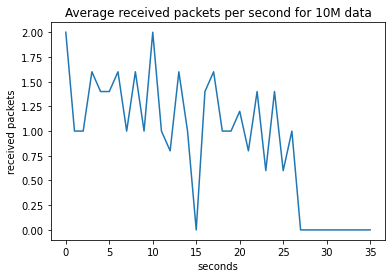

In [137]:
# second_received_packets_lists is a list of list, we want to calculate the max second count
max_second_count = 0
for second_received_packets_list in second_received_packets_lists:
    if len(second_received_packets_list) > max_second_count:
        max_second_count = len(second_received_packets_list)
        
print(f"Max second count: {max_second_count}")
# create a list of size max_second_count, and each element is average of the same second in every list
average_second_received_packets_list_10MB = []
for i in range(max_second_count):
    total_received_packets = 0
    for second_received_packets_list in second_received_packets_lists:
        if i < len(second_received_packets_list):
            total_received_packets += second_received_packets_list[i]
    average_second_received_packets_list_10MB.append(total_received_packets / len(second_received_packets_lists))

# plot the average line chart
plt.plot(average_second_received_packets_list_10MB)
plt.xlabel('seconds')
plt.ylabel('received packets')
plt.title('Average received packets per second for 10M data')
plt.show()

In [13]:
second_received_packets_lists = []
for i in range(1, 6):
    df = get_processed_df(i, 100)
    print(f"Display stats for run {i}")
    get_stats_values(df)
    print("-------------------------")
    second_received_packets_list = []
    for second in range(df['second'].max() + 1):
        second_df = df[df['second'] == second]
        second_received_packets = second_df[second_df['received_time'].notnull()].shape[0]
        second_received_packets_list.append(second_received_packets)
    second_received_packets_lists.append(second_received_packets_list)
    

Display stats for run 1
Total sent packets: 120
Total received packets: 88
Total lost packets: 32
Total lost packets percentage: 26.666666666666668%
Average delay: 931.4204545454545 ms
-------------------------
Display stats for run 2
Total sent packets: 120
Total received packets: 99
Total lost packets: 21
Total lost packets percentage: 17.5%
Average delay: 955.3636363636364 ms
-------------------------
Display stats for run 3
Total sent packets: 120
Total received packets: 93
Total lost packets: 27
Total lost packets percentage: 22.5%
Average delay: 940.6666666666666 ms
-------------------------
Display stats for run 4
Total sent packets: 120
Total received packets: 94
Total lost packets: 26
Total lost packets percentage: 21.666666666666668%
Average delay: 962.031914893617 ms
-------------------------
Display stats for run 5
Total sent packets: 120
Total received packets: 90
Total lost packets: 30
Total lost packets percentage: 25.0%
Average delay: 931.2333333333333 ms
--------------

Max second count: 27


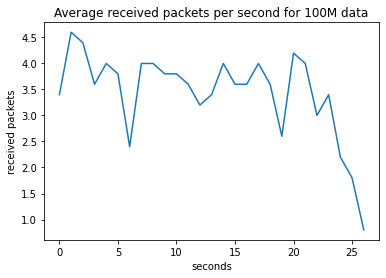

In [139]:
# second_received_packets_lists is a list of list, we want to calculate the max second count
max_second_count = 0
for second_received_packets_list in second_received_packets_lists:
    if len(second_received_packets_list) > max_second_count:
        max_second_count = len(second_received_packets_list)
        
print(f"Max second count: {max_second_count}")
# create a list of size max_second_count, and each element is average of the same second in every list
average_second_received_packets_list_100MB = []
for i in range(max_second_count):
    total_received_packets = 0
    for second_received_packets_list in second_received_packets_lists:
        if i < len(second_received_packets_list):
            total_received_packets += second_received_packets_list[i]
    average_second_received_packets_list_100MB.append(total_received_packets / len(second_received_packets_lists))

# plot the average line chart
plt.plot(average_second_received_packets_list_100MB)
plt.xlabel('seconds')
plt.ylabel('received packets')
plt.title('Average received packets per second for 100M data')
plt.show()

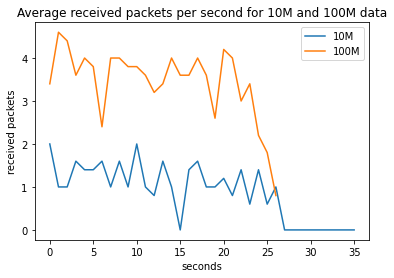

In [140]:
# plot the average line chart for 10M and 100M in the same chart for comparison
plt.plot(average_second_received_packets_list_10MB, label='10M')
plt.plot(average_second_received_packets_list_100MB, label='100M')
plt.xlabel('seconds')
plt.ylabel('received packets')
plt.title('Average received packets per second for 10M and 100M data')
plt.legend()
plt.show()

In [ ]:
second_received_packets_lists = []
for i in range(1, 6):
    df = get_processed_df(i, 100)
    print(f"Display stats for run {i}")
    get_stats_values(df)
    print("-------------------------")
    second_received_packets_list = []
    for second in range(df['second'].max() + 1):
        second_df = df[df['second'] == second]
        second_received_packets = second_df[second_df['received_time'].notnull()].shape[0]
        second_received_packets_list.append(second_received_packets)
    second_received_packets_lists.append(second_received_packets_list)
    

In [16]:
second_received_packets_lists = []
for i in [3, 5, 10, 20, 50]:
    df = get_processed_df(use_drop=True, drop_percent=i)
    print(f"Display stats for run {i}")
    get_stats_values(df)
    print("-------------------------")
    second_received_packets_list = []
    for second in range(df['second'].max() + 1):
        second_df = df[df['second'] == second]
        second_received_packets = second_df[second_df['received_time'].notnull()].shape[0]
        second_received_packets_list.append(second_received_packets)
    second_received_packets_lists.append(second_received_packets_list)
    

Display stats for run 3
Total sent packets: 5000
Total received packets: 460
Total lost packets: 4540
Total lost packets percentage: 90.8%
Average delay: 125.4304347826087 ms
-------------------------
Display stats for run 5
Total sent packets: 10000
Total received packets: 134
Total lost packets: 9866
Total lost packets percentage: 98.66%
Average delay: 354.8059701492537 ms
-------------------------
Display stats for run 10
Total sent packets: 5000
Total received packets: 21
Total lost packets: 4979
Total lost packets percentage: 99.58%
Average delay: 1953.095238095238 ms
-------------------------
Display stats for run 20
Total sent packets: 10000
Total received packets: 2
Total lost packets: 9998
Total lost packets percentage: 99.98%
Average delay: 14570.5 ms
-------------------------


KeyError: 'packet_id'